In [2]:
%run algorithm.ipynb

import matplotlib.pyplot as plt
from datetime import timedelta
import time
import itertools

In [3]:
def test_graph(num_of_nodes,
               edge_existence_prob = 0.3,
               num_iters=30,
               sa_iters=10,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=15,
               tournament_size=3):

    G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)
    while not nx.is_connected(G):
        G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)

    print(f"\n\nTesting a graph of {num_of_nodes} nodes and {len(G.edges)} edges...\n")
    mst=nx.minimum_spanning_tree(G)
    mst_leaves = sum(1 for node in mst if mst.degree[node] == 1)
    
    start_time = time.time()
    best_solution = ga(G, num_iters, sa_iters, elitism_size, mutation_prob, population_size, tournament_size)
    end_time = time.time()

    elapsed_time = end_time - start_time
    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)
    milliseconds = int((elapsed_time * 1000) % 1000)
    
    print(f"Execution time: \t\t\t {minutes}m {seconds}s {milliseconds}ms")
    print(f'Number of leaves of a random MST: \t {mst_leaves}')
    print(f'Number of leaves of MLST: \t\t {best_solution.fitness}')
    
    MLST = nx.Graph()
    MLST.add_edges_from(best_solution.edges)
    
    node_colors = []
    for node in MLST.nodes():
        if MLST.degree[node] == 1:
            node_colors.append('red')
        else:
            node_colors.append('blue')
    
    _, axes = plt.subplots(1, 2, figsize=(10, 5))

    nx.draw(G, node_size=10000/num_of_nodes, ax=axes[0])
    axes[0].set_title("Original graph")

    nx.draw(MLST, node_color=node_colors, node_size=10000/num_of_nodes, ax=axes[1])
    axes[1].set_title("Maximum Leaf Spanning Tree")

    plt.tight_layout()
    plt.show()



Testing a graph of 10 nodes and 9 edges...

Execution time: 			 0m 1s 781ms
Number of leaves of a random MST: 	 6
Number of leaves of MLST: 		 7


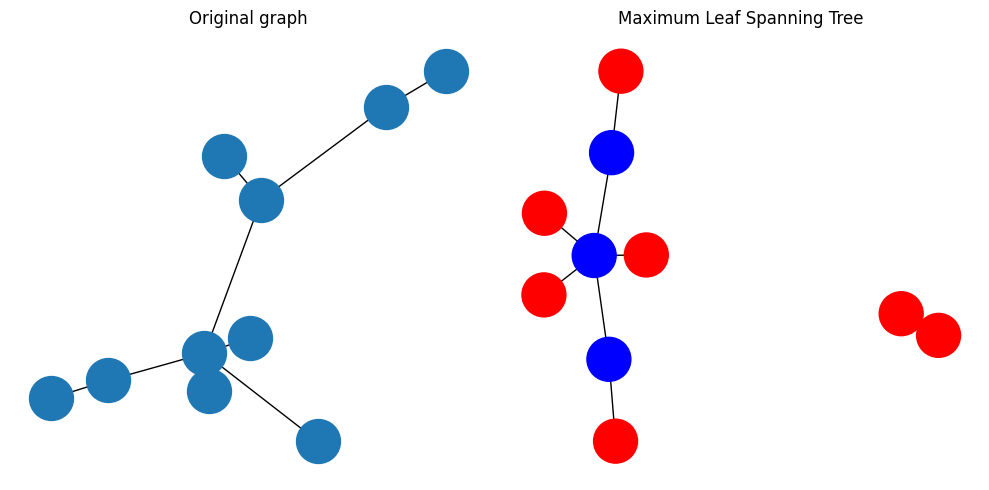

In [4]:
test_graph(num_of_nodes=10,
               edge_existence_prob = 0.2,
               num_iters=10,
               sa_iters=20,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=20,
               tournament_size=5)



Testing a graph of 10 nodes and 30 edges...

Execution time: 			 0m 1s 89ms
Number of leaves of a random MST: 	 6
Number of leaves of MLST: 		 8


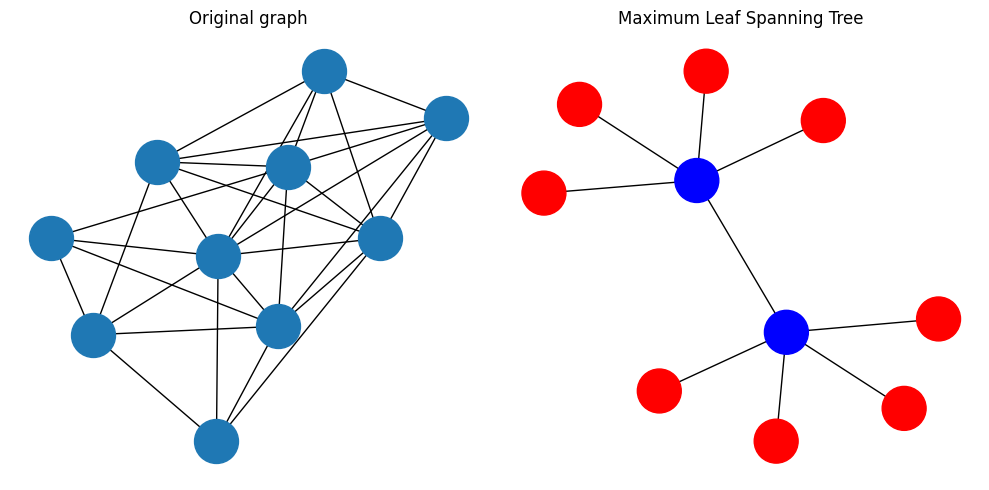

In [8]:
test_graph(num_of_nodes=10,
               edge_existence_prob = 0.5,
               num_iters=20,
               sa_iters=20,
               elitism_size=5,
               mutation_prob=0.5,
               population_size=10,
               tournament_size=5)



Testing a graph of 10 nodes and 36 edges...

Execution time: 			 0m 3s 528ms
Number of leaves of a random MST: 	 9
Number of leaves of MLST: 		 9


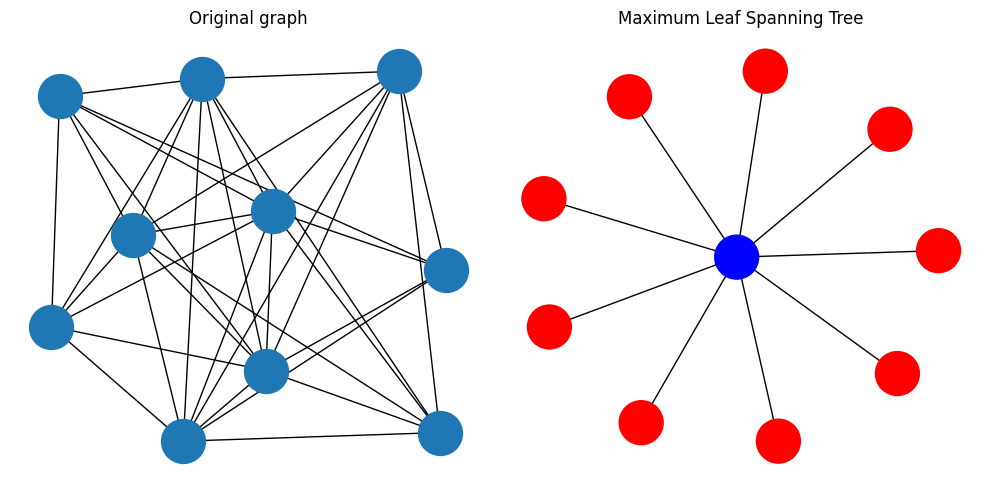

In [14]:
test_graph(num_of_nodes=10,
               edge_existence_prob = 0.7,
               num_iters=10,
               sa_iters=15,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=20,
               tournament_size=5)



Testing a graph of 20 nodes and 42 edges...

Execution time: 			 0m 5s 738ms
Number of leaves of a random MST: 	 13
Number of leaves of MLST: 		 13


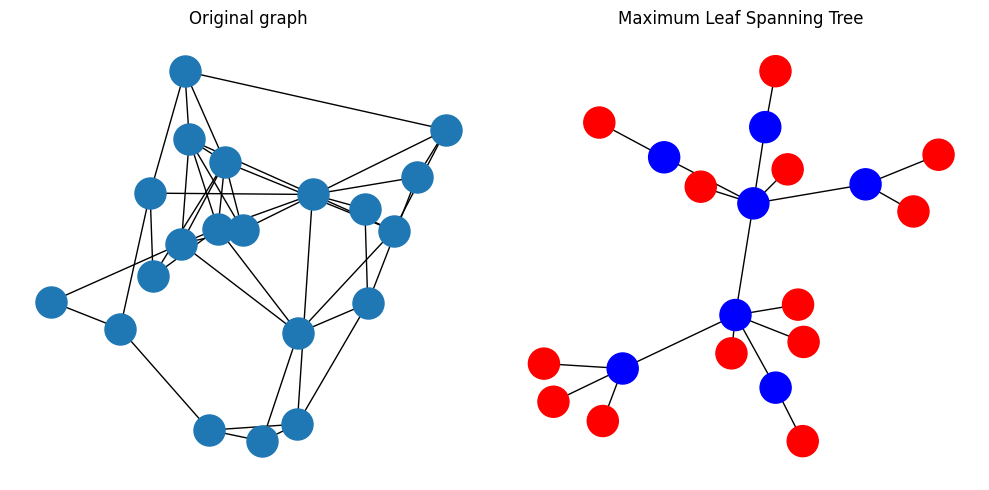

In [15]:
test_graph(num_of_nodes=20,
               edge_existence_prob = 0.2,
               num_iters=10,
               sa_iters=20,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=20,
               tournament_size=10)



Testing a graph of 20 nodes and 94 edges...

Execution time: 			 0m 19s 242ms
Number of leaves of a random MST: 	 14
Number of leaves of MLST: 		 16


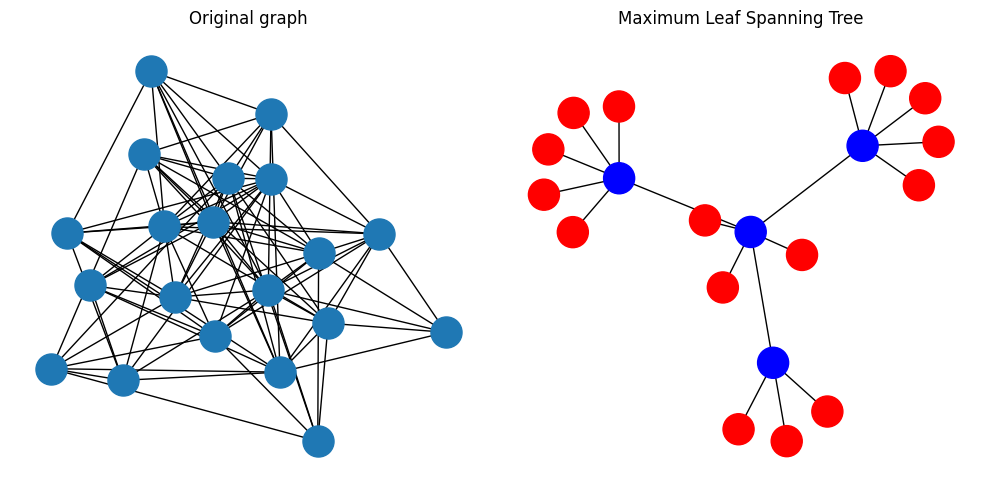

In [16]:
test_graph(num_of_nodes=20,
               edge_existence_prob = 0.5,
               num_iters=10,
               sa_iters=30,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=20,
               tournament_size=10)



Testing a graph of 20 nodes and 130 edges...

Execution time: 			 0m 11s 574ms
Number of leaves of a random MST: 	 17
Number of leaves of MLST: 		 17


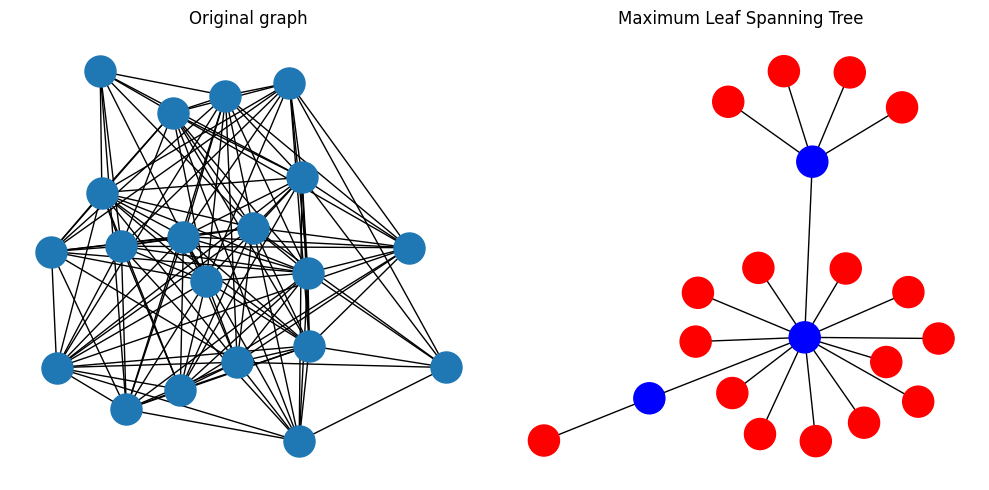

In [20]:
test_graph(num_of_nodes=20,
               edge_existence_prob = 0.7,
               num_iters=10,
               sa_iters=30,
               elitism_size=5,
               mutation_prob=0.1,
               population_size=20,
               tournament_size=10)



Testing a graph of 50 nodes and 253 edges...

Execution time: 			 0m 13s 300ms
Number of leaves of a random MST: 	 37
Number of leaves of MLST: 		 39


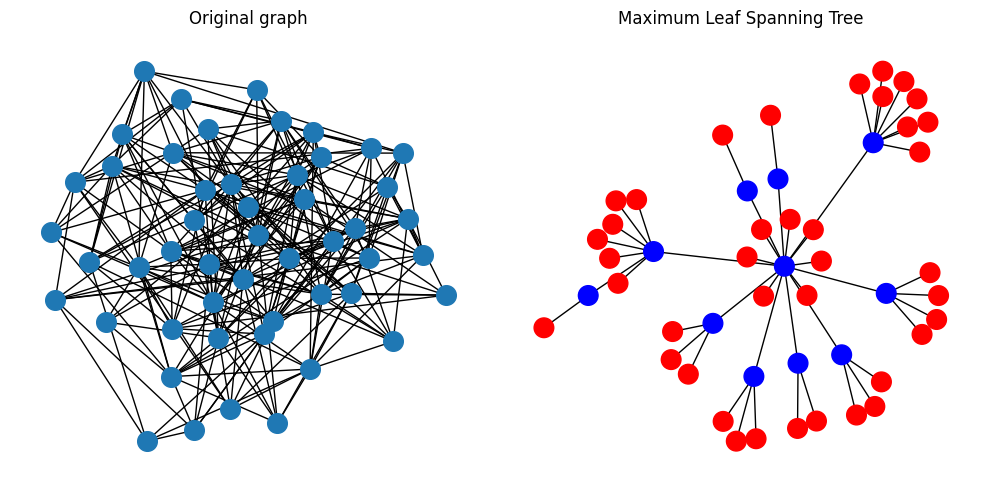

In [21]:
test_graph(num_of_nodes=50,
               edge_existence_prob = 0.2,
               num_iters=10,
               sa_iters=10,
               elitism_size=5,
               mutation_prob=0.5,
               population_size=30,
               tournament_size=5)



Testing a graph of 50 nodes and 596 edges...

Execution time: 			 0m 30s 113ms
Number of leaves of a random MST: 	 43
Number of leaves of MLST: 		 45


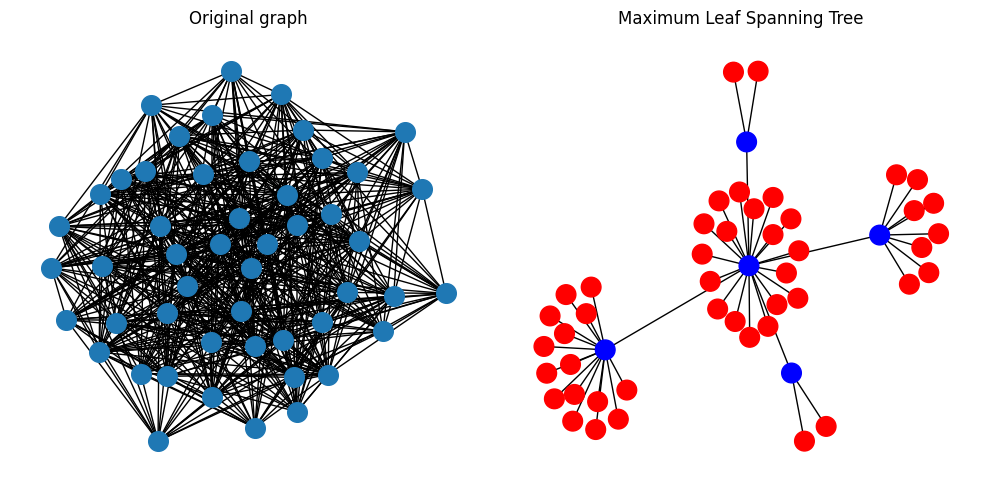

In [22]:
test_graph(num_of_nodes=50,
               edge_existence_prob = 0.5,
               num_iters=10,
               sa_iters=10,
               elitism_size=2,
               mutation_prob=0.7,
               population_size=20,
               tournament_size=10)



Testing a graph of 50 nodes and 855 edges...

Execution time: 			 0m 46s 605ms
Number of leaves of a random MST: 	 46
Number of leaves of MLST: 		 47


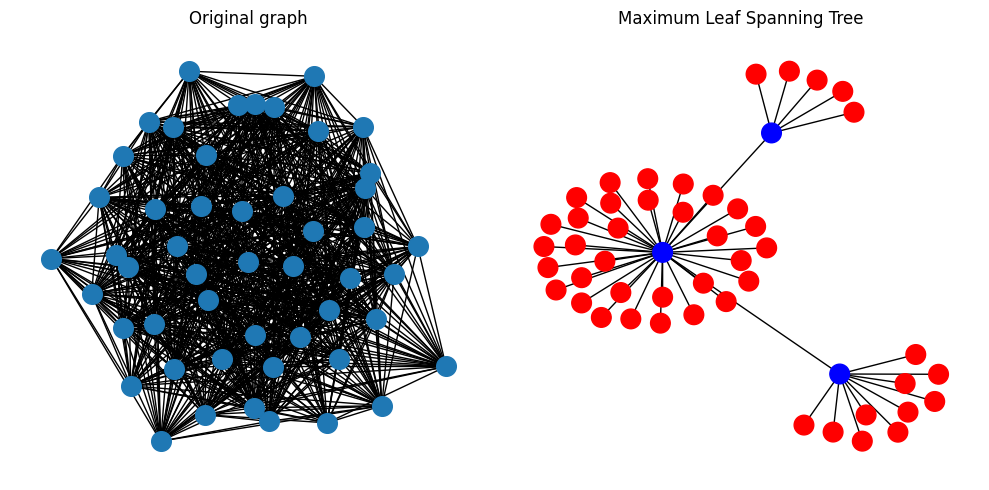

In [26]:
test_graph(num_of_nodes=50,
               edge_existence_prob = 0.7,
               num_iters=10,
               sa_iters=10,
               elitism_size=2,
               mutation_prob=0.5,
               population_size=20,
               tournament_size=5)



Testing a graph of 100 nodes and 1003 edges...

Execution time: 			 1m 24s 691ms
Number of leaves of a random MST: 	 82
Number of leaves of MLST: 		 87


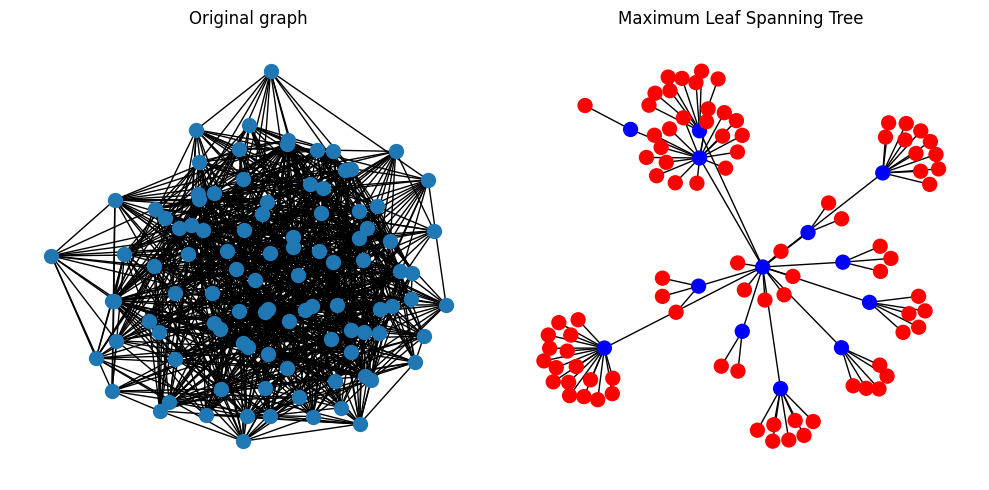

In [27]:
test_graph(num_of_nodes=100,
               edge_existence_prob = 0.2,
               num_iters=10,
               sa_iters=5,
               elitism_size=10,
               mutation_prob=0.5,
               population_size=75,
               tournament_size=20)



Testing a graph of 100 nodes and 2549 edges...

Execution time: 			 11m 33s 6ms
Number of leaves of a random MST: 	 93
Number of leaves of MLST: 		 95


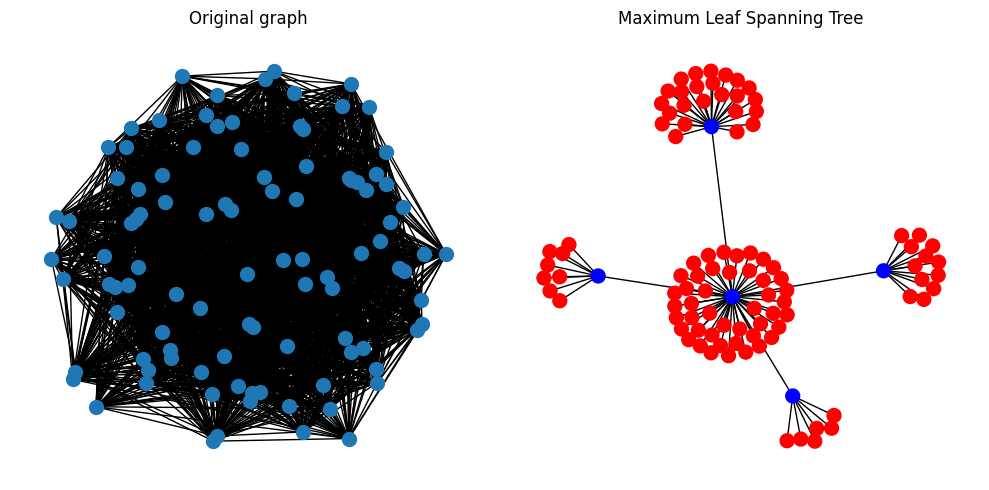

In [28]:
test_graph(num_of_nodes=100,
               edge_existence_prob = 0.5,
               num_iters=15,
               sa_iters=5,
               elitism_size=10,
               mutation_prob=0.1,
               population_size=50,
               tournament_size=10)



Testing a graph of 100 nodes and 3451 edges...

Execution time: 			 12m 44s 22ms
Number of leaves of a random MST: 	 96
Number of leaves of MLST: 		 97


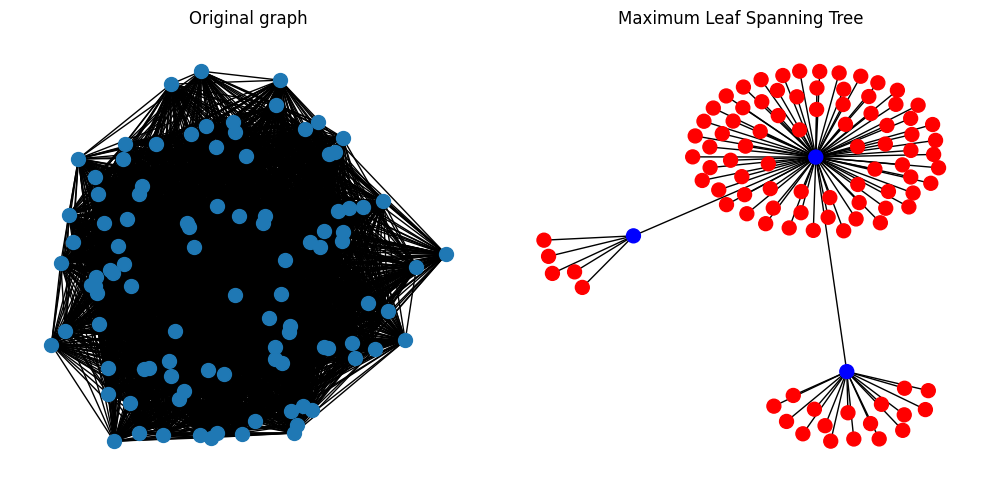

In [29]:
test_graph(num_of_nodes=100,
               edge_existence_prob = 0.7,
               num_iters=15,
               sa_iters=5,
               elitism_size=10,
               mutation_prob=0.1,
               population_size=50,
               tournament_size=10)



Testing a graph of 500 nodes and 24791 edges...

Execution time: 			 149m 6s 430ms
Number of leaves of a random MST: 	 480
Number of leaves of MLST: 		 479


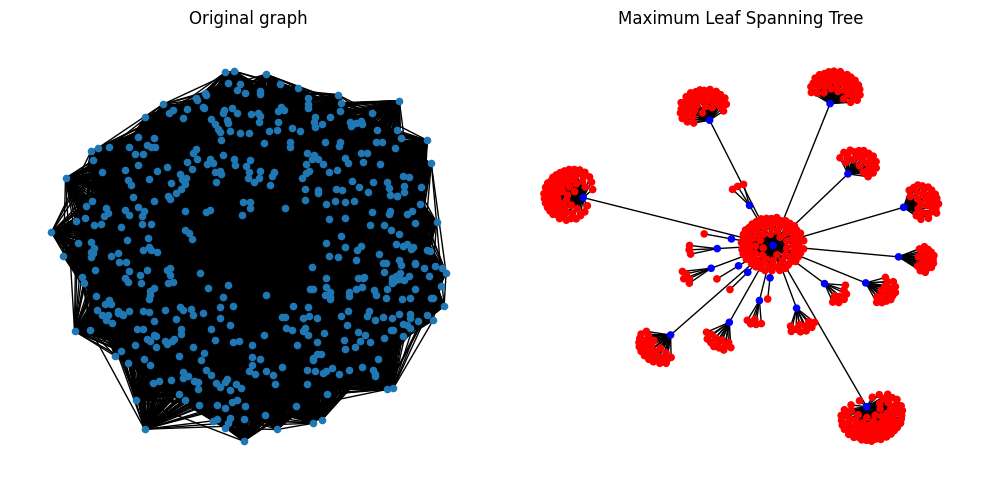

In [3]:
test_graph(num_of_nodes=500,
               edge_existence_prob = 0.2,
               num_iters=10,
               sa_iters=5,
               elitism_size=10,
               mutation_prob=0.1,
               population_size=75,
               tournament_size=20)



Testing a graph of 500 nodes and 62197 edges...

Execution time: 			 755m 8s 448ms
Number of leaves of a random MST: 	 491
Number of leaves of MLST: 		 493


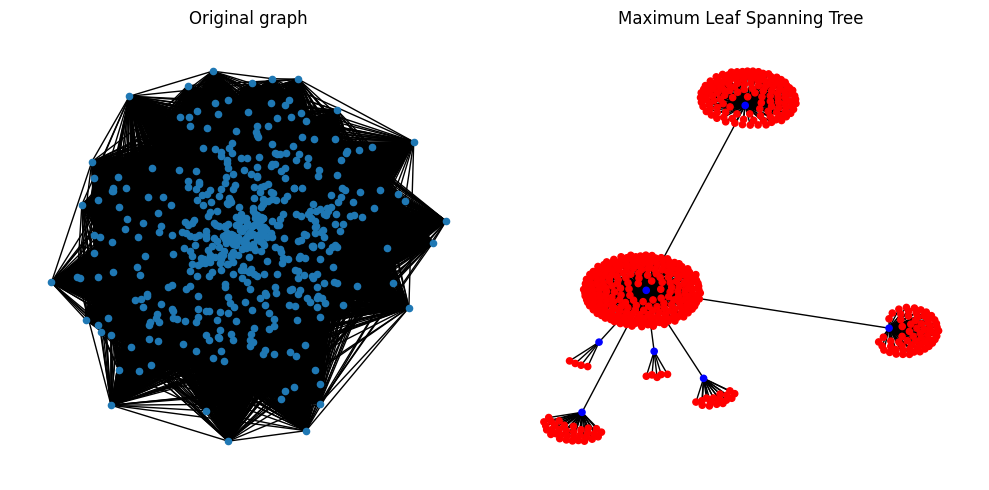

In [4]:
test_graph(num_of_nodes=500,
               edge_existence_prob = 0.5,
               num_iters=10,
               sa_iters=5,
               elitism_size=10,
               mutation_prob=0.1,
               population_size=75,
               tournament_size=20)